# Project Problem

The company experienced problems in loan members to customers. Customers who return to return or pay off loans according to the promised time and nominal period, will certainly harm the company. At present, company managers want to judge which customers are appropriate to be given credit and which are not feasible. They have data about customers obtained when customers fill out online forms. Managers want to create a data analysis to identify customer segments so that they can target who will be given a loan. In other words, the prediction model will greatly help them in making business decisions.

# Project Goal

The purpose of this project is to predict the person who will make a loan, whether it is worth approved or not. In addition to predicting, this project will also conduct related data analysis to find information and knowledge as a basis for making business decisions. What will be done in this project are:
1. Exploratory Data Analysis (EDA) to view and find out the characteristics of data.
2. Missing Value, Outliers, and Manipulating Data.
3. Analyze data to find out information about the variables to be used in the prediction model
4. Conduct label encoding and standardization by making pipelines
5. Create a model using regression logistics and decision tree

This project consists of two parts:
1. Prepare Data
    - Import
    - Exploratory Data Analysis (EDA)
    - Analyze
    - Feature Engineering
2. Build Model
    - Logistic Regression 
        - Basline
        - Iterate
        - Evaluate
    - Decision Tree Classifier
        - Baseline
        - Hyperparameter tunning and Iterate
        - Evaluate

# Data Description

1. Loan_ID: Unique Loan Number
2. Gender: The gender of the loan applicant
3. Married: The marital status of the loan applicant
4. Dependents: Number of dependents of children or family
5. Education: The education status of the loan applicant
6. Self_Employed: Loan applicant job status
7. ApplicantIncome: Applicant's monthly income
8. Coapplicantincome: Applicant's side income
9. Loan Amount: Total loan
10. Loan_Amount_Term: loan period
11. Credit History: Quality of Credit History. 1: Good, 0: Bad
12. Property Area: Loan applicant property location
13. Loan_Status: Loan Status (Y: Accepted, N: Non Accepted)

# 1. Prepare Data

## -------------------------------------------------  Import  ------------------------------------------------------

In [1]:
# import relevan libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
sns.set()

In [2]:
# load data into dataframe
df = pd.read_csv("loan_customer_data.csv")
print("Number of rows and columns:", df.shape)
print("Top 5 dataset")
df.head()

Number of rows and columns: (614, 13)
Top 5 dataset


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## ---------------------------------------  Exploratory Data Analysis  -----------------------------------------

In this section we will try to see the characteristics of the data that will be used in the model and clean the data from missing value.

In [3]:
# check data information and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# check statistic descriptive
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# check missing value
print("Number of missing value: ")
print("-"*25)
df.isnull().sum()

Number of missing value: 
-------------------------


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

This dataset has 2 data types, namely numerical data and categorical data. To find out the characteristics of each data, we will start exploring data and overcoming missing values.

### Gender

In [6]:
# Gender visualisation
print("Proportion of gender: ")
print("-"*20)
print(df["Gender"].value_counts(normalize=True))

# removing missing value
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

# check missing value
print("\nNumber of missing value after imputation:")
print("-"*20)
print(df["Gender"].isnull().sum())

Proportion of gender: 
--------------------
Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

Number of missing value after imputation:
--------------------
0


<AxesSubplot:xlabel='Gender', ylabel='count'>

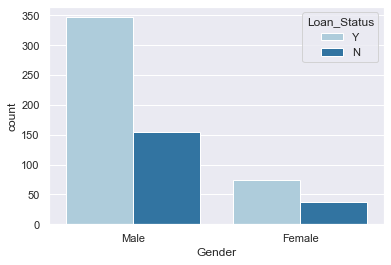

In [7]:
sns.countplot(x="Gender", hue="Loan_Status", data=df, palette="Paired")

Gender has a male proportion of 81%. This is greater than the proportion of female which is around 19%. The gender variable also has 13 missing value data. To overcome the missing value. Because this includes categorical data, I will imputize using mode.

### Married Status

In [8]:
# Gender visualisation
print("proportion of marital status: ")
print("-"*20)
print(df["Married"].value_counts(normalize=True))

# removing missing value
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

# check missing value
print("\nNumber of missing value after imputation:")
print("-"*20)
print(df["Married"].isnull().sum())

proportion of marital status: 
--------------------
Yes    0.651391
No     0.348609
Name: Married, dtype: float64

Number of missing value after imputation:
--------------------
0


<AxesSubplot:xlabel='Married', ylabel='count'>

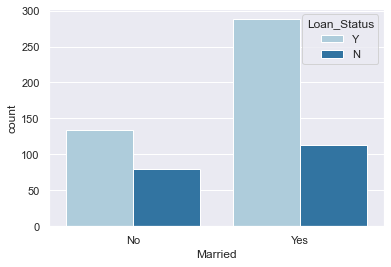

In [9]:
sns.countplot(x="Married", hue="Loan_Status", data=df, palette="Paired")

From the visualization above, married borrowers are more accepted than unmarried. I also overcome the missing value of this variable by imputing using mode

### Dependents

In [10]:
# Gender visualisation
print("proportion of dependents: ")
print("-"*20)
print(df["Dependents"].value_counts(normalize=True))

# removing missing value
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

# check missing value
print("\nNumber of missing value after imputation:")
print("-"*20)
print(df["Dependents"].isnull().sum())

proportion of dependents: 
--------------------
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

Number of missing value after imputation:
--------------------
0


<AxesSubplot:xlabel='Dependents', ylabel='count'>

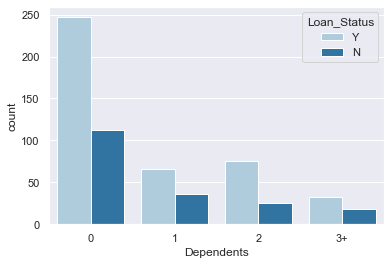

In [11]:
sns.countplot(x="Dependents", hue="Loan_Status", data=df, palette="Paired")

Applicants who do not have the dependents of children or families are more accepted by the borrowing status than those who have dependents. However, applicants who have two dependents are more accepted than those who have one family dependents. So this cannot be concluded that fewer boredom, the loan will be received. One interesting information is that when applicants have a lot of dependents, their income may also increase. Because a lot of dependents will reduce the rate of income tax burden so that income increases. Is there a relationship between dependents and applicants' income? Let's see the following

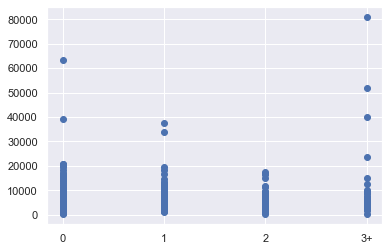

In [12]:
plt.scatter(x="Dependents", y="ApplicantIncome", data=df)

Apparently not, the dependents of the family have no relationship with applicant's income if we see from the visualization above. There may be other factors that affect the number of dependents with the receipt of the loan. We will try to explore other variables to find deeper information

### Self Employed

In [13]:
# Gender visualisation
print("proportion of self employee: ")
print("-"*20)
print(df["Self_Employed"].value_counts(normalize=True))

# removing missing value
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

# check missing value
print("\nNumber of missing value after imputation:")
print("-"*20)
print(df["Self_Employed"].isnull().sum())

proportion of self employee: 
--------------------
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

Number of missing value after imputation:
--------------------
0


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

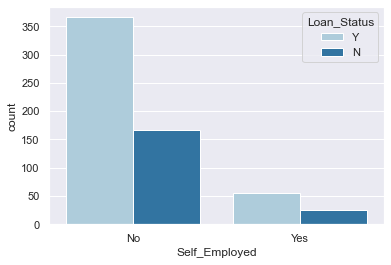

In [14]:
sns.countplot(x="Self_Employed", hue="Loan_Status", data=df, palette="Paired")

The number of applicants received by the loan turned out to be more who did not work

### Credit History

In [15]:
# Gender visualisation
print("proportion of credit history: ")
print("-"*20)
print(df["Credit_History"].value_counts(normalize=True))

# removing missing value
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

proportion of credit history: 
--------------------
1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64


In [16]:
# check missing value
print("\nNumber of missing value after imputation:")
print("-"*20)
print(df["Credit_History"].isnull().sum())


Number of missing value after imputation:
--------------------
0


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

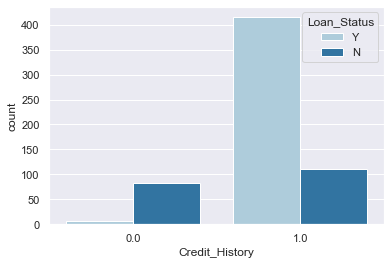

In [17]:
sns.countplot(x="Credit_History", hue="Loan_Status", data=df, palette="Paired")

Applicants who have good credit history are significantly accepted than those who are not. This answers the question beforehand questions that although applicants have a lot of family dependents, a little income, and not working they can still be accepted by their loan applications if they have good credit history.

### LoanAmount

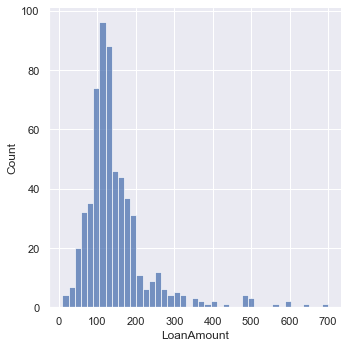

In [18]:
sns.displot(df["LoanAmount"])

From the graph above, we can see that the average number of loans ranges from 100-190. This variable also has a missing value of 22. The way to overcome it is by imputing using the mean value

In [19]:
# removing missing value
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())


# check missing value
print("\nNumber of missing value after imputation:")
print("-"*20)
print(df["LoanAmount"].isnull().sum())


Number of missing value after imputation:
--------------------
0


### Loan Amount Term

In [20]:
# check value counts
print("Number of value count: ")
print('-'*20)
print(df["Loan_Amount_Term"].value_counts(normalize=True)*100)

# removing missing value
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())

# check missing value
print("\nNumber of missing value after imputation:")
print("-"*20)
print(df["Loan_Amount_Term"].isnull().sum())

Number of value count: 
--------------------
360.0    85.333333
180.0     7.333333
480.0     2.500000
300.0     2.166667
240.0     0.666667
84.0      0.666667
120.0     0.500000
60.0      0.333333
36.0      0.333333
12.0      0.166667
Name: Loan_Amount_Term, dtype: float64

Number of missing value after imputation:
--------------------
0


From the loan applicant data of 85.6% borrowed within a period of 360 days or one year. If we see from the two numerical data above there are indications of our data have outliers. Let's check outliers from numerical data using boxplot

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

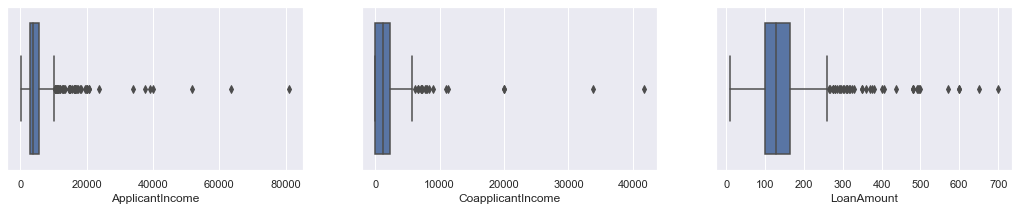

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,3))

sns.boxplot(df["ApplicantIncome"], ax=ax1)

sns.boxplot(df["CoapplicantIncome"], ax=ax2)

sns.boxplot(df["LoanAmount"], ax=ax3)

And it turns out it is true, numeric data in this dataset has an outlier value in the three variables. Outlier that is left can interfere with the performance of the model. We will handle the outlier using IQR.

In [22]:
# Create IQR
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3-Q1

# Removing outliers
df = df[~((df<(Q1-1.5*IQR)) | (df > (Q3+1.5*IQR)))]
df = df.dropna()

C:\Users\HP\AppData\Local\Temp/ipykernel_1564/2292403276.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<(Q1-1.5*IQR)) | (df > (Q3+1.5*IQR)))]


## -----------------------------------------------  Analyze Data  --------------------------------------------------

### Check the Distribution of Numerical Data

Text(0.5, 1.0, 'Loan Amount Distribution')

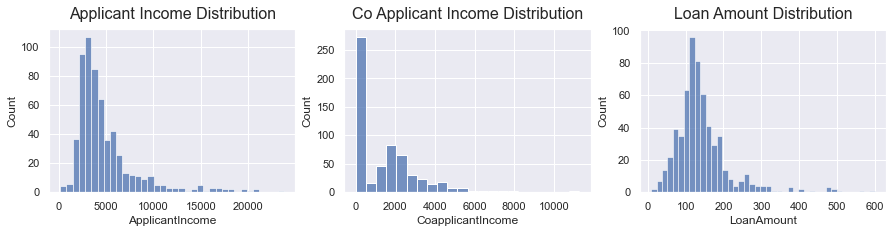

In [23]:
# check distribution using histogram
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,3))
# Applicant Income
sns.histplot(df["ApplicantIncome"], ax=ax1)
ax1.set_title("Applicant Income Distribution", size=16, pad=10)
# Co Applicant Income
sns.histplot(df["CoapplicantIncome"], ax=ax2)
ax2.set_title("Co Applicant Income Distribution", size=16, pad=10)
# Loan Amount
sns.histplot(df["LoanAmount"], ax=ax3)
ax3.set_title("Loan Amount Distribution", size=16, pad=10)


### Check Multicollinearity

Text(0.5, 1.0, 'Feature Correlation')

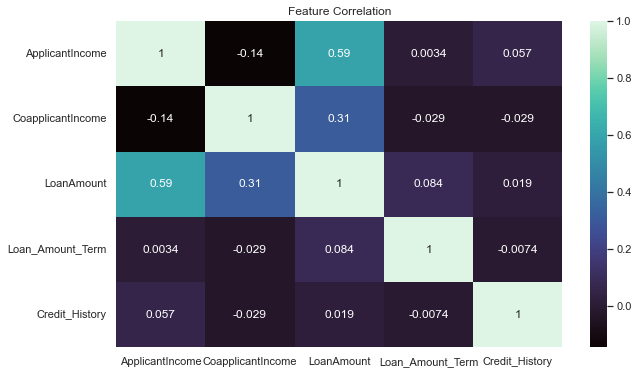

In [24]:
plt.figure(figsize=(10,6))
corr = df.corr(method="pearson")
sns.heatmap(corr, annot=True, cmap="mako")
plt.title("Feature Correlation")

We have handled outliers in the three variables in the prepare data stage. And we can see that numerical data has spread better than before

### Is there any relationship between Loan Amount and Applicant Total Income?

Maybe we think that the more income, the loan can be done in large quantities because he is not worried about the return of the loan. Or are people with a small amount of income tend to borrow in large quantities? Many possibilities about the relationship between the two variables. We will see the relationship between the two using a scatter plot

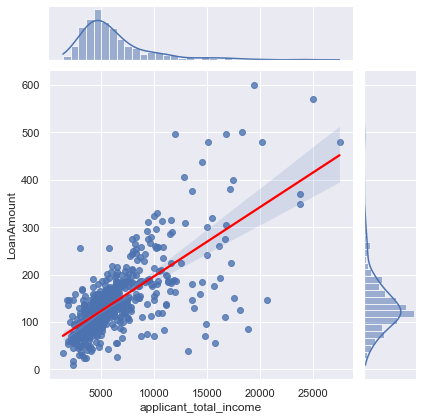

In [25]:
df["applicant_total_income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
g = sns.jointplot(x = "applicant_total_income", y="LoanAmount", data=df, kind='reg')
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)
df.drop(columns='applicant_total_income', inplace=True)

From the graph above, it can be seen that the relationship between the amount of loan and the total income can be said to be positive but not significant. We can conclude that in some total loan situations it may be based on the level of borrower's income. So, it would be better if in providing loans, the company pays attention to the borrower's financial capabilities

### Is there any relationship between Loan Amount and Loan Term?

There is a possibility that the large amount of loan tends to be done in a long time due regard because for a large amount of return requires time for borrowers. But is the statement really? We will see the relationship between the loan amount and the loan period.

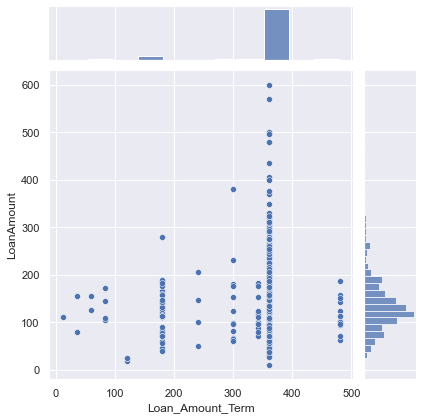

In [26]:
sns.jointplot(x = "Loan_Amount_Term", y="LoanAmount", data=df)

From the scatter plot above it can be concluded that there is no relationship between the amount of loan and the loan period.

### Which location has the most total loans?

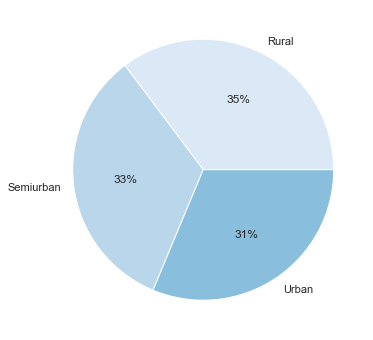

In [27]:
df_area = df.groupby("Property_Area")["LoanAmount"].mean().reset_index()
plt.figure(figsize=(6,6))
palette_color = sns.color_palette('Blues')
plt.pie(df_area["LoanAmount"], labels=df_area["Property_Area"], colors=palette_color, autopct='%.0f%%')
plt.show()

Pie chart shows the rural area has an average amount of loan more than other areas. However, the difference between the three areas is not very significant

### Do people living in rural areas have a good credit history?
With information that the Rural population has the most average amount of loan, the next question is whether the Rural population has a good history of credit?

<AxesSubplot:xlabel='Property_Area'>

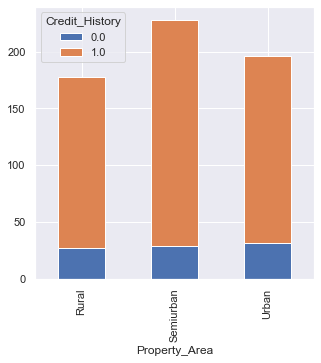

In [28]:
pd.crosstab(df["Property_Area"],df["Credit_History"]).plot(kind="bar", stacked=True, figsize=(5,5))

It turns out that the rural area has the lowest good credit history than other areas.

### Does an educated person have a good credit history?

Educated people tend to have attitudes and are good. Either working or not, if someone has good behavior, they will tend to be responsible for what they do. Those who are responsible are possible to have a good credit history

<AxesSubplot:xlabel='Education'>

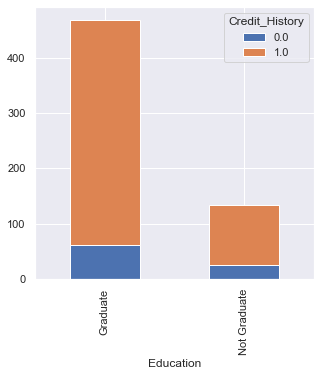

In [29]:
pd.crosstab(df["Education"],df["Credit_History"]).plot(kind="bar", stacked=True, figsize=(5,5))

And it was true that good credit history was more obtained by educated borrowers

## ----------------------------------------  Feature Engineering  ------------------------------------------

### Label Encoding
We will make the code only for the target variable, the status loan. While other variables we will make coding using OneHotencoder

In [30]:
# label encoding
df.replace({"Loan_Status" : {"N":0, "Y":1}}, inplace=True)

# check data
df["Loan_Status"].value_counts()

1    415
0    187
Name: Loan_Status, dtype: int64

### Deal with High/Low Cardinality Categorical Features

In [31]:
# check for high/low cardinality categorical features
df_categorical = df.select_dtypes(include="object").nunique()
df_categorical

Loan_ID          602
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
dtype: int64

As we see that the loan_id variable has a high cardinality. We will eliminate these variables.

In [32]:
df.drop(columns='Loan_ID', inplace=True)

### Create Target Features

In [33]:
# create feature and target
target = "Loan_Status"
y = df[target]
X = df.drop("Loan_Status", axis=1)

### Deal with Overfitting

In [34]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy=0.5)

X, y = oversampler.fit_resample(X, y)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

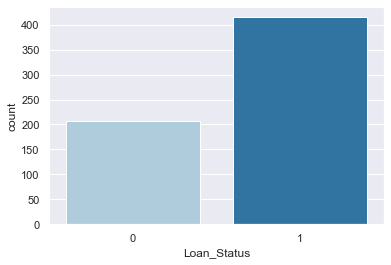

In [35]:
sns.countplot(x=y, data=df, palette="Paired")

### Split Dataset

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape: (497, 11)
y_train shape: (497,)
X_test shape: (125, 11)
y_test shape (125,)


# 2. Build Model

## -------------------------------------------  Logistic Regression  ---------------------------------------------

### Baseline

In [37]:
# calculate baseline accuracy
acc_baseline = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy: ', round(acc_baseline, 4))

Baseline Accuracy:  0.6559


### Iterate

In [38]:
# create pipeline model
model = make_pipeline(
    (OneHotEncoder(use_cat_names=True)),
    (StandardScaler()),
    (LogisticRegression())
)

# fit the model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Married', 'Dependents',
                                     'Education', 'Self_Employed',
                                     'Property_Area'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

### Evaluate

In [39]:
# calculate training and test accuracy scores
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, model.predict(X_test))

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.7988
Test Accuracy: 0.872


In [40]:
print(classification_report(y_test, model.predict(X_test)))
print(confusion_matrix(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.58      0.72        36
           1       0.85      0.99      0.92        89

    accuracy                           0.87       125
   macro avg       0.90      0.79      0.82       125
weighted avg       0.88      0.87      0.86       125

[[21 15]
 [ 1 88]]


## -----------------------------------------------  Decision Tree  --------------------------------------------------

### Baseline

In [41]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.66


### Hyperparameter tunning and Iteration

In [42]:
depth_hyperparams = range(1,16)
training_acc = []
test_acc = []
for d in depth_hyperparams:
    model_dt = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(max_depth=d, random_state=42))
    model_dt.fit(X_train, y_train)
    
    training_acc.append(accuracy_score(y_train, model_dt.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model_dt.predict(X_test)))

print("Training Accuracy Scores:", training_acc[:3])
print("Test Accuracy Scores:", test_acc[:3])

Training Accuracy Scores: [0.7907444668008048, 0.8008048289738431, 0.806841046277666]
Test Accuracy Scores: [0.872, 0.832, 0.84]


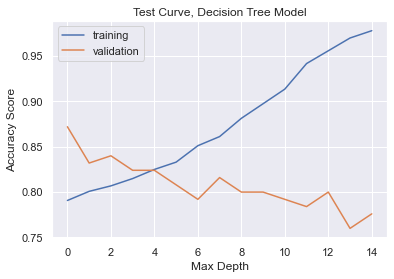

In [43]:
plt.plot(training_acc, label="training")
plt.plot(test_acc, label="validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.title("Test Curve, Decision Tree Model")
plt.legend()

In [44]:
# create final model
final_model_dt = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(max_depth=5, random_state=42))

# fit the model
final_model_dt.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Gender', 'Married', 'Dependents',
                                      'Education', 'Self_Employed',
                                      'Property_Area'],
                                mapping=[{'col': 'Gender',
                                          'data_type': dtype('O'),
                                          'mapping': Male      1
Female    2
NaN      -2
dtype: int64},
                                         {'col': 'Married',
                                          'data_type': dtype('O'),
                                          'mapping': Yes    1
No     2
NaN   -2
dtype: int64},
                                         {'col': 'Dependents',
                                          'data_type': dtype('O'),
                                          'mapping': 0      1...
                                         {'col': 'Education',
                                          'data_type': dtype('O'),
                                          'mapping': Graduate        1
Not Graduate    2
NaN            -2
dtype: int64},
                                         {'col': 'Self_Employed',
                                          'data_type': dtype('O'),
                                          'mapping': No     1
Yes    2
NaN   -2
dtype: int64},
                                         {'col': 'Property_Area',
                                          'data_type': dtype('O'),
                                          'mapping': Urban        1
Rural        2
Semiurban    3
NaN         -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

### Evaluate

In [45]:
test_acc = accuracy_score(y_test, final_model_dt.predict(X_test))
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.82


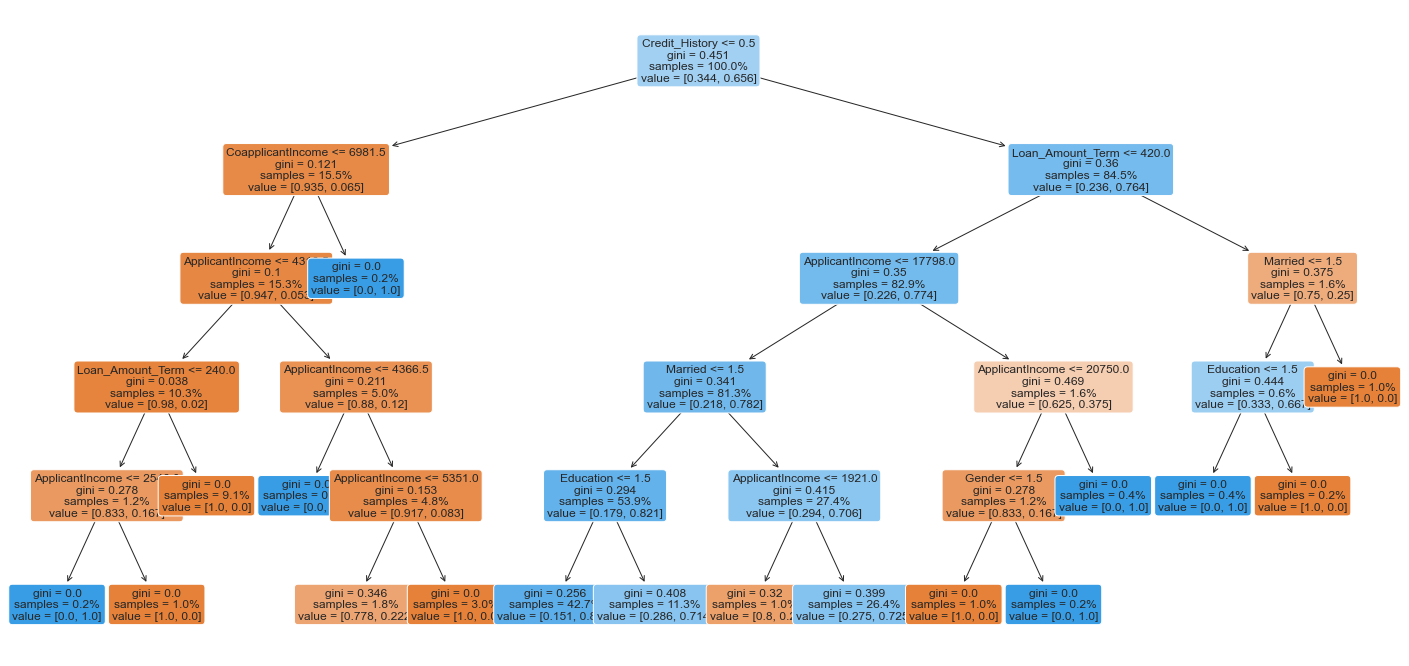

In [46]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=final_model_dt.named_steps['decisiontreeclassifier'],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=5,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

# Reference

https://www.kaggle.com/code/simtoor/loan-prediction-svm/notebook

https://www.kaggle.com/code/caesarmario/loan-prediction-w-various-ml-models#6.-Models-%F0%9F%9B%A0